In [16]:
from datasets import list_datasets


In [17]:
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 59257 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [20]:
from datasets import load_dataset
emotions = load_dataset('emotion')

Generating test split: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 62750.00 examples/s]


In [21]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [22]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [23]:
len(train_ds)

16000

In [24]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [25]:
train_ds.column_names

['text', 'label']

In [26]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [27]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [28]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"

In [29]:
!wget {dataset_url}

/bin/bash: /home/bigai/.conda/envs/BIGAI/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-08-30 12:36:40--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 108.138.51.41, 108.138.51.8, 108.138.51.21, ...
Connecting to huggingface.co (huggingface.co)|108.138.51.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1,6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1,58M  1,21MB/s    in 1,3s    

2023-08-30 12:36:42 (1,21 MB/s) - ‘train.txt’ saved [1658616/1658616]



In [30]:
!head -n 1 train.txt

/bin/bash: /home/bigai/.conda/envs/BIGAI/lib/libtinfo.so.6: no version information available (required by /bin/bash)
i didnt feel humiliated;sadness


In [31]:
emotions_local = load_dataset('csv', data_files='train.txt', sep=';', names=['text','label'])

Extracting data files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 326.76it/s]
Generating train split: 16000 examples [00:00, 300193.53 examples/s]


In [32]:
emotions_local

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

In [33]:
import pandas as pd

emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [34]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [35]:
df["label_name"] = df["label"].apply(label_int2str)

In [36]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


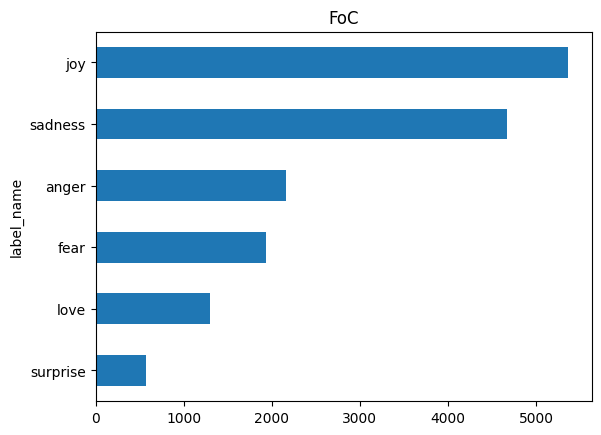

In [37]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('FoC')
plt.show()

In [38]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)

In [39]:
df

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


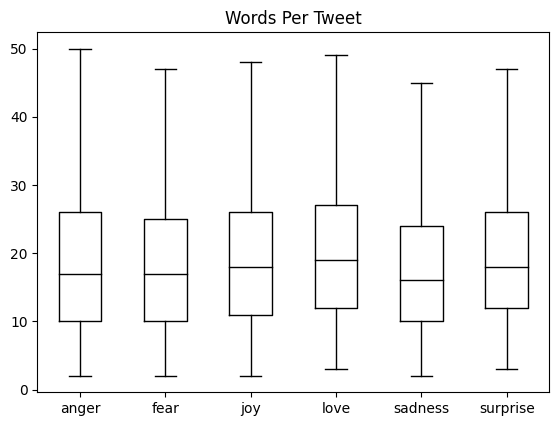

In [41]:
df.boxplot('Words Per Tweet', by='label_name', grid=False,showfliers=False,color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

In [42]:
emotions.reset_format()

In [43]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)

In [44]:
tokenized_text

['T',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'e',
 'x',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'c',
 'o',
 'r',
 'e',
 ' ',
 't',
 'a',
 's',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'L',
 'P',
 '.']

In [51]:
token2idx = {ch: idx for idx,ch in enumerate(sorted(set(tokenized_text)))}

In [52]:
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [53]:
input_ids = [token2idx[token] for token in tokenized_text]

In [54]:
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 17,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [55]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [56]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [57]:
tokenized_text = text.split()

In [58]:
tokenized_text

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']